# Importing Libraries

In [243]:
import nltk
import re
from nltk import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

# Reading Text File

In [244]:
f = open('Text_3.txt',encoding='utf-8')
txt = f.read()

# Removing Punctuation

In [245]:
punc_space = ["(",")","+","≈","=",'"',"-","?","&","%",':',"\n","/",",",";",'“', '”','[',']']
punc_no_space = ["’","."]
punc_num = r'[0-9]'
pattern = re.compile("[" + re.escape("".join(punc_space)) + "]")
pattern2 = re.compile("[" + re.escape("".join(punc_no_space)) + "]") 
re_1 = re.sub(pattern, " ", txt)
re_2 = re.sub(pattern2, "", re_1)
re3 = re.sub(punc_num," ",re_2)

In [246]:
lower = re3.lower()

# Tokenization

In [247]:
tokens = word_tokenize(lower)

In [248]:
words = re.findall(r'\w+', lower)

# Frequency

In [249]:
c = Counter(words)

In [250]:
dic = list(dict(c).items())

# Sorting

In [251]:
sort = sorted(dic,key=lambda l:l[1],reverse =True)
words = list(dict(sort).keys())
frequency = list(dict(sort).values())

# Ranking

In [252]:
ranks = []
r = 0
for i in range(len(frequency)):
    if(i==len(frequency)-1):
        if(frequency[i]==frequency[i-1]):
            ranks.append(r)
        else:
            ranks.append(r+1)
    elif(frequency[i]==frequency[i+1]):
        ranks.append(r)
    else:
        ranks.append(r+1)
        r = r+1

# Plotting

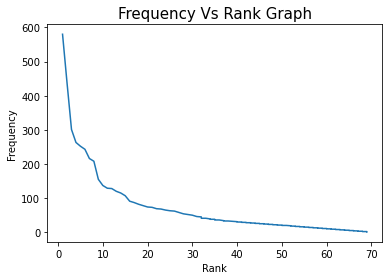

In [253]:
plt.plot(ranks,frequency)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Frequency Vs Rank Graph", fontsize=15)
plt.show()

# K (proportionality constant) between frequency and rank

In [254]:
#k = 1/(sum(1/rank))
l = []
for i in ranks:
    l.append(1/i)
sm = sum(l)
k = 1/sm
print(k)

0.02962063906142276


In [255]:
#f(x) = k/x
fx = []
for i in ranks:
    fx.append(k/i)

# Plotting

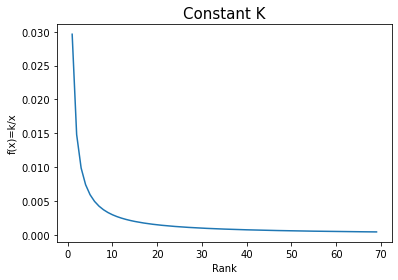

In [256]:
plt.plot(ranks,fx)
plt.xlabel("Rank")
plt.ylabel("f(x)=k/x")
plt.title("Constant K", fontsize=15)
plt.show()

# conformance of the data to Zipf’s law

In [260]:
sort[:3]

[('the', 580), ('of', 438), ('a', 301)]

In [200]:
"Zipf's law states that frequency of a word should be inversely proptional to their ranks."
"That means frequency of 3rd most frequent word should have 1/3rd frequency as that of most frequent word's frequency." 
"In out data rank 1,2 and 3 belongs to the(frequency = 580), of(frequency = 438) and a(frequency = 301)."
"Rank 2's frequency is nowhere close to half of rank 1's frequency"
"Rank 3's frequency is nowhere close to one third of rank 1's frequency"
"Hence Zipf's law does not hold here"

"Hence Zipf's law does not hold here"